# Project 4
## CS 5483
## Due 13 Nov at 9 am

#### Question 1: Module 7 -- Real world networks and features

1.a) Read the graph from http://networkrepository.com/ca-Erdos992.php

In [4]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



In [5]:

G=nx.read_edgelist('ca-Erdos992.mtx',comments="%")

1.b) For the given graph compute the degree distribution. (Do not use networkx library to compute the distribution)

In [6]:
def degrees(G):
    """List of degrees for nodes in `G`.
    
    G: Graph object
    
    returns: list of int
    """
    return [G.degree(u) for u in G]
from empiricaldist import Pmf ## pip install empiricaldist - PMF - Probability Mass Function
pmf_G = Pmf.from_seq(degrees(G))
for i in range (1,11):
    print(f"{pmf_G[i]*100}% of the nodes have {i} degrees")

70.6713780918728% of the nodes have 1 degrees
12.426383981154299% of the nodes have 2 degrees
4.495484884177463% of the nodes have 3 degrees
2.37534354142128% of the nodes have 4 degrees
1.315272870043188% of the nodes have 5 degrees
0.7852375343541421% of the nodes have 6 degrees
0.5889281507656066% of the nodes have 7 degrees
0.43188064389477815% of the nodes have 8 degrees
0.3337259521005104% of the nodes have 9 degrees
0.3729878288182175% of the nodes have 10 degrees


1.c) Plot a log-log graph of the distribution where x-axis represents log of degrees, and the y-axis represents log of frequency of the degrees. Does the plot show a linear decay?

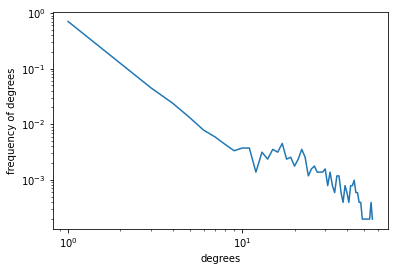

In [7]:
fig, ax = plt.subplots()
ax.plot(range(1,len(pmf_G)+1), pmf_G)

ax.set(xlabel='degrees', ylabel='frequency of degrees')
ax.set_xscale("log", nonpositive='clip')
ax.set_yscale("log", nonpositive='clip')


plt.show()


1.d) Determine alpha in the power law distribution using the equation

 alpha = 1 + n/(summation ln 𝑥_𝑖/(𝑥_min−1/2))
 - i ranges from 0 to number of degrees
 - where n in number of degrees
 - x_i is each degree in the degree array
 - x_min is the minimum degree

In [8]:
SUM=0
for i in range(len(degrees(G))):
    SUM=np.log(degrees(G)[i]/(1-1/2))+SUM

alpha=1+len(degrees(G))/SUM
alpha

1.8886098882422728

#### Question 2: Module 8 -- Random graphs
*You may use networkx library*

2.a) Construct 5 random undirected graph with n = 1000, and probability 0.01, 0.1, 0.2, 0.3, 0.5 as G1, G2, G3, G4, and G5. Then find the size of the largest connected component. 

**Note : Use different seed value for each graph.**

__Note：The probability is set lower for proper size of largest connected components__

In [9]:

G1=nx.gnp_random_graph(n=1000, p=0.0001, seed=1, directed=False)
G2=nx.gnp_random_graph(n=1000, p=0.001, seed=2, directed=False)
G3=nx.gnp_random_graph(n=1000, p=0.002, seed=3, directed=False)
G4=nx.gnp_random_graph(n=1000, p=0.003, seed=4, directed=False)
G5=nx.gnp_random_graph(n=1000, p=0.005, seed=5, directed=False)

In [10]:
G1_c=[len(c) for c in sorted(nx.connected_components(G1), key=len, reverse=True)][0]

G1_c

4

In [11]:
G2_c=[len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)][0]

G2_c

47

In [12]:
G3_c=[len(c) for c in sorted(nx.connected_components(G3), key=len, reverse=True)][0]

G3_c

783

In [13]:
G4_c=[len(c) for c in sorted(nx.connected_components(G4), key=len, reverse=True)][0]

G4_c

934

In [14]:
G5_c=[len(c) for c in sorted(nx.connected_components(G5), key=len, reverse=True)][0]

G5_c

994

2.b) Plot the following

- x-axis probablity
- y-axis largest connected component

and infer what does increase in probablity mean with respect to the largest connected component


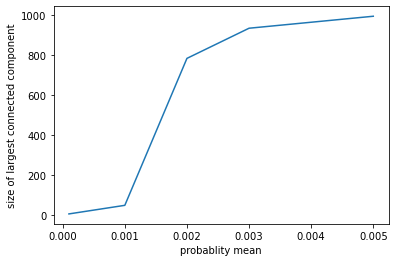

In [15]:
fig, ax = plt.subplots()
ax.plot([0.0001,0.001,0.002,0.003,0.005],[G1_c,G2_c,G3_c,G4_c,G5_c])

ax.set(xlabel='probablity mean', ylabel='size of largest connected component')


plt.show()

There is a positive relationship between them.

2.c) For the same set of graphs, compute the average degree and plot probablity on the x-axis, and average degree on the y-axis


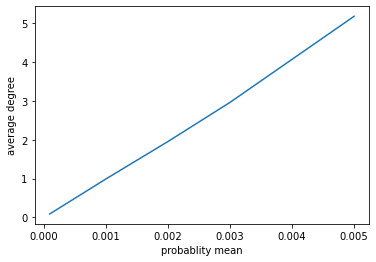

In [16]:
average_degree=[sum(degrees(G1))/len(degrees(G1)),sum(degrees(G2))/len(degrees(G2)),
                sum(degrees(G3))/len(degrees(G3)),sum(degrees(G4))/len(degrees(G4)),
                sum(degrees(G5))/len(degrees(G5))]

fig, ax = plt.subplots()
ax.plot([0.0001,0.001,0.002,0.003,0.005],average_degree)

ax.set(xlabel='probablity mean', ylabel='average degree')


plt.show()

2.d) Finally, compute the average size of the small component for each graph G1, ..., G5

In [27]:
G1_average=np.mean([len(c) for c in sorted(nx.connected_components(G1), key=len, reverse=True)][1:])

G1_average

1.0440251572327044

In [29]:
G2_average=np.mean([len(c) for c in sorted(nx.connected_components(G2), key=len, reverse=True)][1:])

G2_average

1.883399209486166

In [30]:
G3_average=np.mean([len(c) for c in sorted(nx.connected_components(G3), key=len, reverse=True)][1:])

G3_average

1.3151515151515152

In [31]:
G4_average=np.mean([len(c) for c in sorted(nx.connected_components(G4), key=len, reverse=True)][1:])

G4_average

1.1

In [32]:
G5_average=np.mean([len(c) for c in sorted(nx.connected_components(G5), key=len, reverse=True)][1:])

G5_average

1.0